In [1]:
import pandas as pd

In [2]:
import pickle

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_parquet("D:\\MLOPs_Zoomcamp\\01-intro\\green_tripdata_2021-02.parquet")



In [6]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-02-01 00:34:03,2021-02-01 00:51:58,N,1.0,130,205,5.0,3.66,14.00,0.50,0.5,10.00,0.0,None,0.3,25.30,1.0,1.0,0.00
1,2,2021-02-01 00:04:00,2021-02-01 00:10:30,N,1.0,152,244,1.0,1.10,6.50,0.50,0.5,0.00,0.0,None,0.3,7.80,2.0,1.0,0.00
2,2,2021-02-01 00:18:51,2021-02-01 00:34:06,N,1.0,152,48,1.0,4.93,16.50,0.50,0.5,0.00,0.0,None,0.3,20.55,2.0,1.0,2.75
3,2,2021-02-01 00:53:27,2021-02-01 01:11:41,N,1.0,152,241,1.0,6.70,21.00,0.50,0.5,0.00,0.0,None,0.3,22.30,2.0,1.0,0.00
4,2,2021-02-01 00:57:46,2021-02-01 01:06:44,N,1.0,75,42,1.0,1.89,8.50,0.50,0.5,2.45,0.0,None,0.3,12.25,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64567,2,2021-02-28 22:19:00,2021-02-28 22:29:00,None,NaN,129,7,NaN,2.63,10.04,0.00,0.0,0.00,0.0,None,0.3,10.34,NaN,NaN,NaN
64568,2,2021-02-28 23:18:00,2021-02-28 23:27:00,None,NaN,116,166,NaN,1.87,8.33,0.00,0.0,1.89,0.0,None,0.3,10.52,NaN,NaN,NaN
64569,2,2021-02-28 23:44:00,2021-02-28 23:58:00,None,NaN,74,151,NaN,2.40,12.61,0.00,0.0,0.00,0.0,None,0.3,12.91,NaN,NaN,NaN
64570,2,2021-02-28 23:07:00,2021-02-28 23:14:00,None,NaN,42,42,NaN,1.11,11.95,2.75,0.0,0.00,0.0,None,0.3,15.00,NaN,NaN,NaN


In [7]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

df = df[(df.duration >= 1) & (df.duration <= 60)]




In [8]:
df = df[df.trip_type ==2]

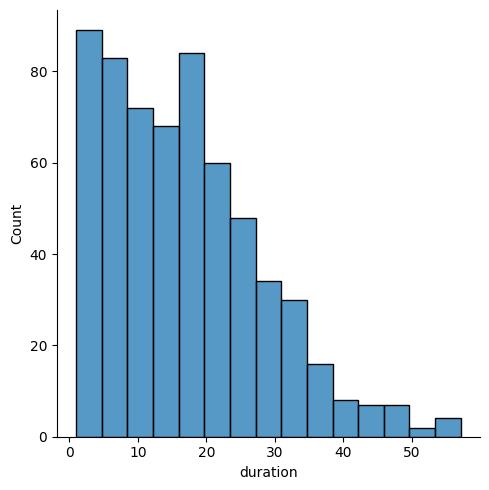

In [9]:
sns.displot(df.duration)

In [10]:
df.duration.describe()

count    612.000000
mean      16.866449
std       11.411988
min        1.000000
25%        7.662500
50%       15.375000
75%       23.620833
max       57.116667
Name: duration, dtype: float64

In [11]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

In [18]:
df[categorical]

,PULocationID,DOLocationID
5,197,219
9,78,78
114,75,74
125,223,92
150,223,100
...,...,...
35391,243,235
35423,247,69
35446,69,78
35447,69,74


In [12]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

c:\Users\tariq\miniconda3\envs\dtalk\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5.746304968879795

C:\Users\tariq\AppData\Local\Temp\ipykernel_13600\1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
C:\Users\tariq\AppData\Local\Temp\ipykernel_13600\1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


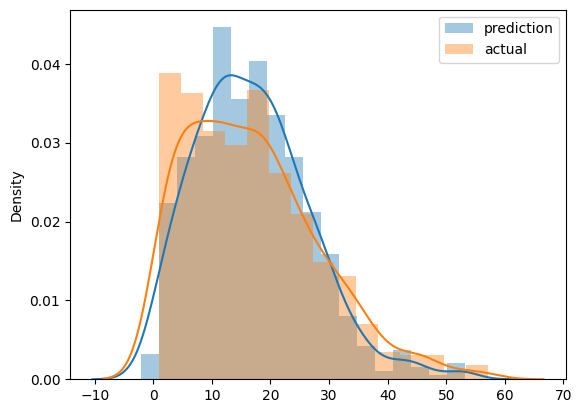

In [19]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [22]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [25]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
5,2,2021-02-01 00:33:03,2021-02-01 00:40:54,N,5.0,197,219,1.0,3.30,15.0,...,0.0,0.76,0.00,None,0.3,16.06,1.0,2.0,0.00,7.850000
9,2,2021-02-01 02:56:55,2021-02-01 02:58:38,N,5.0,78,78,1.0,0.00,24.0,...,0.0,0.00,0.00,None,0.3,24.30,2.0,2.0,0.00,1.716667
114,2,2021-02-01 19:01:09,2021-02-01 19:11:20,N,5.0,75,74,1.0,1.80,15.0,...,0.0,0.00,0.00,None,0.3,15.30,1.0,2.0,0.00,10.183333
125,2,2021-02-01 22:57:12,2021-02-01 23:07:36,N,5.0,223,92,1.0,4.98,50.0,...,0.0,0.00,0.00,None,0.3,50.30,2.0,2.0,0.00,10.400000
150,2,2021-02-02 06:31:38,2021-02-02 06:50:10,N,5.0,223,100,1.0,5.64,50.0,...,0.0,13.26,0.00,None,0.3,66.31,1.0,2.0,2.75,18.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35391,2,2021-02-28 20:15:35,2021-02-28 20:32:59,N,5.0,243,235,2.0,2.32,16.0,...,0.0,0.00,0.00,None,0.3,16.30,2.0,2.0,0.00,17.400000
35423,2,2021-02-28 21:54:17,2021-02-28 22:04:58,N,5.0,247,69,2.0,1.51,18.0,...,0.0,0.00,0.00,None,0.3,18.30,2.0,2.0,0.00,10.683333
35446,2,2021-02-28 22:07:07,2021-02-28 22:25:11,N,5.0,69,78,2.0,3.57,12.0,...,0.0,0.00,0.00,None,0.3,12.30,2.0,2.0,0.00,18.066667
35447,2,2021-02-28 22:41:32,2021-02-28 23:08:58,N,5.0,69,74,2.0,5.06,17.0,...,0.0,0.00,0.00,None,0.3,17.30,2.0,2.0,0.00,27.433333


In [26]:
df_train = read_dataframe("D:\\MLOPs_Zoomcamp\\01-intro\\green_tripdata_2021-01.parquet")
df_val = read_dataframe('D:\\MLOPs_Zoomcamp\\01-intro\\green_tripdata_2021-02.parquet')

In [27]:
len(df_train), len(df_val)

(73908, 61921)

In [28]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [29]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [30]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

c:\Users\tariq\miniconda3\envs\dtalk\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.758715212021978

In [33]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

c:\Users\tariq\miniconda3\envs\dtalk\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


11.167275941179728

In [34]:
with open('D:\\MLOPs_Zoomcamp\\01-intro\\models\\lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)